<a href="https://colab.research.google.com/github/AadityaKhetan/VISION/blob/master/SGPCurrencyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile



In [2]:
local_zip = 'D:/Chinnu_Project/VISION/CUR_Dataset/Thai and Indian Currency Dataset256x256.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/')
zip_ref.close()
#location="D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Thai Currencies"
#location2="D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/2000/INDIA2000_16.jpg"
#!rm -rf '/tmp/Thai and Indian Currency Dataset256x256/Thai Currencies'
#os.remove(location)

#!rm -rf '/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/2000/INDIA2000_16.jpg'
#os.remove(location2)

In [3]:
train_10_New = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/10 New')
train_10_Old = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/10 Old')
train_100_New = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/100 New')
train_100_Old = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/100 Old')
train_20 = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/20')
train_200 = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/200')
train_2000 = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/2000')
train_50_New = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/50 New')
train_50_Old = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/50 Old')
train_500 = os.path.join('D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/500')

In [4]:
print('total training images of 10 New: ', len(os.listdir(train_10_New)))
print('total training images of 10 Old: ', len(os.listdir(train_10_Old)))
print('total training images of 100 New:', len(os.listdir(train_100_New)))
print('total training images of 100 Old:', len(os.listdir(train_100_Old)))
print('total training images of 20:     ', len(os.listdir(train_20)))
print('total training images of 200:    ', len(os.listdir(train_200)))
print('total training images of 2000:   ', len(os.listdir(train_2000)))
print('total training images of 50 New: ', len(os.listdir(train_50_New)))
print('total training images of 50 Old: ', len(os.listdir(train_50_Old)))
print('total training images of 500:    ', len(os.listdir(train_500)))

total training images of 10 New:  250
total training images of 10 Old:  190
total training images of 100 New: 190
total training images of 100 Old: 190
total training images of 20:      190
total training images of 200:     190
total training images of 2000:    189
total training images of 50 New:  190
total training images of 50 Old:  190
total training images of 500:     190


In [5]:
to_create = [
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/10New',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/10New',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/10Old',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/10Old',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/100New',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/100New',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/100Old',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/100Old',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/20',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/20',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/200',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/200',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/2000',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/2000',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/50New',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/50New',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/50Old',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/50Old',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/500',
    'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/500'
]

for directory in to_create:
    try:
        os.mkdir(directory)
        print(directory, 'created')
    except:
        print(directory, 'failed')

D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/10New failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/10New failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/10Old failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/10Old failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/100New failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/100New failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/100Old failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/100Old failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/20 failed
D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/20 failed
D:/Chinnu_Project/VIS

In [6]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    all_files = []
    
    for file_name in os.listdir(SOURCE):
        file_path = SOURCE + file_name

        if os.path.getsize(file_path):
            all_files.append(file_name)
        else:
            print('{} is zero length, so ignoring'.format(file_name))
    
    n_files = len(all_files)
    split_point = int(n_files * SPLIT_SIZE)
    
    shuffled = random.sample(all_files, n_files)
    
    train_set = shuffled[:split_point]
    test_set = shuffled[split_point:]
    
    for file_name in train_set:
        copyfile(SOURCE + file_name, TRAINING + file_name)
        
    for file_name in test_set:
        copyfile(SOURCE + file_name, TESTING + file_name)

split_size = .9

NEW10_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/10 New/"
TRAINING_NEW10_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/10New/"
TESTING_NEW10_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/10New/"

split_data(NEW10_SOURCE_DIR, TRAINING_NEW10_DIR, TESTING_NEW10_DIR, split_size)

Old10_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/10 Old/"
TRAINING_OLD10_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/10New/"
TESTING_OLD10_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/10New/"

split_data(Old10_SOURCE_DIR, TRAINING_OLD10_DIR, TESTING_OLD10_DIR, split_size)

NEW100_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/100 New/"
TRAINING_NEW100_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/100New/"
TESTING_NEW100_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/100New/"

split_data(NEW100_SOURCE_DIR, TRAINING_NEW100_DIR, TESTING_NEW100_DIR, split_size)

OLD100_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/100 Old/"
TRAINING_OLD100_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/100Old/"
TESTING_OLD100_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/100Old/"

split_data(OLD100_SOURCE_DIR, TRAINING_OLD100_DIR, TESTING_OLD100_DIR, split_size)

NEW20_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/20/"
TRAINING_NEW20_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/20/"
TESTING_NEW20_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/20/"

split_data(NEW20_SOURCE_DIR, TRAINING_NEW20_DIR, TESTING_NEW20_DIR, split_size)

NEW200_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/200/"
TRAINING_NEW200_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/200/"
TESTING_NEW200_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/200/"

split_data(NEW200_SOURCE_DIR, TRAINING_NEW200_DIR, TESTING_NEW200_DIR, split_size)

NEW2000_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/2000/"
TRAINING_NEW2000_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/2000/"
TESTING_NEW2000_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/2000/"

split_data(NEW2000_SOURCE_DIR, TRAINING_NEW2000_DIR, TESTING_NEW2000_DIR, split_size)

NEW50_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/50 New/"
TRAINING_NEW50_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/50New/"
TESTING_NEW50_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/50New/"

split_data(NEW50_SOURCE_DIR, TRAINING_NEW50_DIR, TESTING_NEW50_DIR, split_size)

OLD50_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/50 Old/"
TRAINING_OLD50_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/50Old/"
TESTING_OLD50_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/50Old/"

split_data(OLD50_SOURCE_DIR, TRAINING_OLD50_DIR, TESTING_OLD50_DIR, split_size)

NEW500_SOURCE_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/Thai and Indian Currency Dataset256x256/Indian Currencies/500/"
TRAINING_NEW500_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/500/"
TESTING_NEW500_DIR = r"D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/500/"

split_data(NEW500_SOURCE_DIR, TRAINING_NEW500_DIR, TESTING_NEW500_DIR, split_size)

print(len(os.listdir(TRAINING_NEW10_DIR)))
print(len(os.listdir(TESTING_NEW10_DIR)))

print(len(os.listdir(TRAINING_OLD10_DIR)))
print(len(os.listdir(TESTING_OLD10_DIR)))

print(len(os.listdir(TRAINING_NEW100_DIR)))
print(len(os.listdir(TESTING_NEW100_DIR)))

print(len(os.listdir(TRAINING_OLD100_DIR)))
print(len(os.listdir(TESTING_OLD100_DIR)))

print(len(os.listdir(TRAINING_NEW20_DIR)))
print(len(os.listdir(TESTING_NEW20_DIR)))

print(len(os.listdir(TRAINING_NEW200_DIR)))
print(len(os.listdir(TESTING_NEW200_DIR)))

print(len(os.listdir(TRAINING_NEW2000_DIR)))
print(len(os.listdir(TESTING_NEW2000_DIR)))

print(len(os.listdir(TRAINING_NEW50_DIR)))
print(len(os.listdir(TESTING_NEW50_DIR)))

print(len(os.listdir(TRAINING_OLD50_DIR)))
print(len(os.listdir(TESTING_OLD50_DIR)))

print(len(os.listdir(TRAINING_NEW500_DIR)))
print(len(os.listdir(TESTING_NEW500_DIR)))




440
118
440
118
190
53
190
53
190
54
190
52
189
52
190
50
190
53
190
52


In [7]:
'''class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
  if(logs.get('accuracy')>0.65):
      print("\nReached 70% accuracy so cancelling training!")
      self.model.stop_training = True 

callbacks = myCallback()
'''
model = tf.keras.models.Sequential([

    # This is the first convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9

In [9]:
#model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=90,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [11]:
TRAINING_DIR = 'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/training/'
#train_datagen = ImageDataGenerator(rescale= 1/255)
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256)
)

VALIDATION_DIR = 'D:/Chinnu_Project/VISION/CUR_Dataset/tmp/indiancurrency/testing/'
validation_datagen = ImageDataGenerator(rescale= 1/255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=32,
    class_mode='categorical',
    target_size=(256, 256)
)

Found 1959 images belonging to 10 classes.
Found 537 images belonging to 10 classes.


In [12]:
history = model.fit(
      train_generator,
      epochs=20,  
      verbose=1,
      validation_data=validation_generator)
      #callbacks=[callbacks])

Epoch 1/20
62/62 [==============================] - 70s 1s/step - loss: 2.2059 - accuracy: 0.2124 - val_loss: 2.1964 - val_accuracy: 0.2197
Epoch 2/20
62/62 [==============================] - 68s 1s/step - loss: 2.1046 - accuracy: 0.2425 - val_loss: 1.8914 - val_accuracy: 0.2700
Epoch 3/20
62/62 [==============================] - 69s 1s/step - loss: 1.8115 - accuracy: 0.3206 - val_loss: 1.7879 - val_accuracy: 0.2495
Epoch 4/20
62/62 [==============================] - 68s 1s/step - loss: 1.7207 - accuracy: 0.3425 - val_loss: 1.6459 - val_accuracy: 0.3818
Epoch 5/20
62/62 [==============================] - 72s 1s/step - loss: 1.5319 - accuracy: 0.4191 - val_loss: 1.2400 - val_accuracy: 0.5438
Epoch 6/20
62/62 [==============================] - 69s 1s/step - loss: 1.4310 - accuracy: 0.4472 - val_loss: 1.2561 - val_accuracy: 0.4562
Epoch 7/20
62/62 [==============================] - 68s 1s/step - loss: 1.2384 - accuracy: 0.5299 - val_loss: 1.1208 - val_accuracy: 0.5698
Epoch 8/20
62/62 [==

In [13]:
history1 = model.evaluate(
      validation_generator)
      #callbacks=[callbacks])

17/17 [==============================] - 3s 146ms/step - loss: 0.4743 - accuracy: 0.8436


Plotting loss and accuracy.

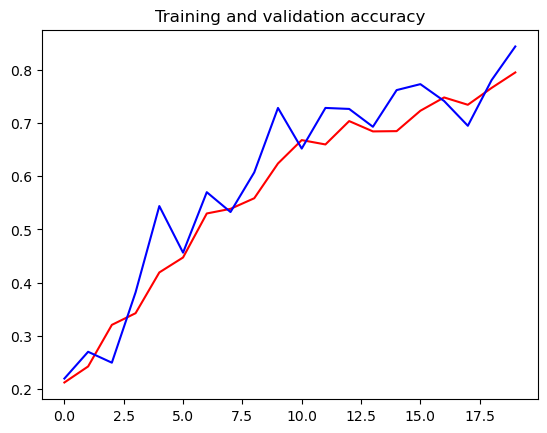

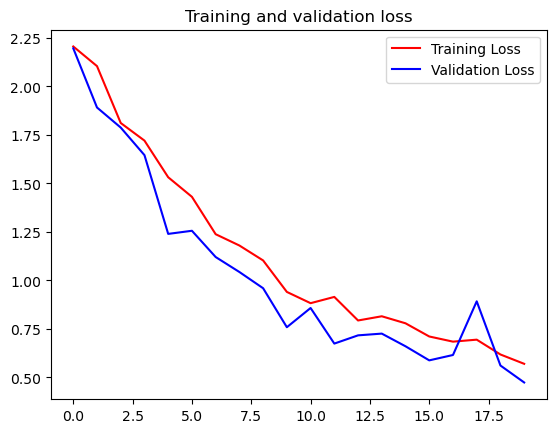

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Predicting with new images.

In [15]:
'''import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])

  #predictions = model.predict(images,batch_size=32)
  #class_names = ['10RsNote', '10RsNote', '100RsNote', '100RsNote','20RsNote','200RsNote', '2000RsNote','50RsNote','50RsNote','500RsNote']
  #print(model.predict_classes())
  print(np.argmax(model.predict(images), axis=-1))'''

"import numpy as np\nfrom google.colab import files\nfrom keras.preprocessing import image\n\nuploaded = files.upload()\n\nfor fn in uploaded.keys():\n \n  # predicting images\n  path = fn\n  img = image.load_img(path, target_size=(256, 256))\n  x = image.img_to_array(img)\n  x = np.expand_dims(x, axis=0)\n\n  images = np.vstack([x])\n\n  #predictions = model.predict(images,batch_size=32)\n  #class_names = ['10RsNote', '10RsNote', '100RsNote', '100RsNote','20RsNote','200RsNote', '2000RsNote','50RsNote','50RsNote','500RsNote']\n  #print(model.predict_classes())\n  print(np.argmax(model.predict(images), axis=-1))"

Export the model


In [16]:
INDIAN_CURRENCY_SAVED_MODEL = "exp_saved_model"
tf.saved_model.save(model, INDIAN_CURRENCY_SAVED_MODEL)
loaded = tf.saved_model.load(INDIAN_CURRENCY_SAVED_MODEL)
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

INFO:tensorflow:Assets written to: exp_saved_model\assets
['serving_default']
((), {'conv2d_input': TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='conv2d_input')})
{'dense_1': TensorSpec(shape=(None, 10), dtype=tf.float32, name='dense_1')}


Convert using TFLite's converter

In [17]:
converter = tf.lite.TFLiteConverter.from_saved_model(INDIAN_CURRENCY_SAVED_MODEL)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model = converter.convert()
tflite_model_file = 'converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

CREATING LABEL.TXT

In [18]:
labels = ['10 Rupees', 'Rupees 10','100 Rupees','Rupees 100','20 Rupees','200 Rupees','2000 Rupees','50 Rupees','Rupees 50','500 Rupees']

with open('labels.txt', 'w') as f:
    f.write('\n'.join(labels))

Downloading files

In [19]:

try:
    from google.colab import files
    files.download('converted_model.tflite')
    files.download('labels.txt')
except:
    pass